In [27]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from sklearn.ensemble import RandomForestClassifier
import time

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.reshape(x_train.shape[0],32,32,3)
x_test = x_test.reshape(x_test.shape[0],32,32,3)

In [28]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
init_time = time.time()
rf = RandomForestClassifier(max_depth=8)
rf.fit(x_train, y_train)
print("Train Acc: ", rf.score(x_train, y_train))
print("Test Acc: ", rf.score(x_test, y_test))
print("Time: ", time.time() - init_time)

/Users/nozawa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train Acc:  0.43602
Test Acc:  0.3714
Time:  11.72766900062561


In [6]:
from sklearn.svm import LinearSVC

x_train_normed = x_train / np.linalg.norm(x_train, ord=2, axis=1, keepdims=True)
x_test_normed = x_test / np.linalg.norm(x_test, ord=2, axis=1, keepdims=True)
init_time = time.time()
svc = LinearSVC()
svc.fit(x_train_normed, y_train)
print("Train Acc: ", svc.score(x_train_normed, y_train))
print("Test Acc: ", svc.score(x_test_normed, y_test))
print("Time: ", time.time() - init_time)

/Users/nozawa/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/nozawa/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Acc:  0.45122
Test Acc:  0.4062
Time:  177.61263394355774


In [29]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Input,Flatten


'''modelの設定'''
model = Sequential()
'''
    modelにレイヤーを追加
    32*32の3チャンネル画像を一次元に伸ばして入力(32*32*3=3072)
'''
model.add(Dense(512, activation='relu',input_shape=(32*32*3,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

'''modelに訓練プロセスを設定'''
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

init_time = time.time()
''' 訓練データを設定＆学習 '''
result3 = model.fit(x_train, y_train, epochs=20, batch_size=32,validation_split=0.2)

''' モデルの評価 '''
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
print("Loss: ", loss_and_metrics[0], ", Acc: ", loss_and_metrics[1])
print("Time: ", time.time()-init_time)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 37s 928us/step - loss: 1.8917 - acc: 0.3118 - val_loss: 1.7895 - val_acc: 0.3549
Epoch 2/20
40000/40000 [==============================] - 37s 932us/step - loss: 1.7043 - acc: 0.3847 - val_loss: 1.7022 - val_acc: 0.3893
Epoch 3/20
40000/40000 [==============================] - 37s 922us/step - loss: 1.6254 - acc: 0.4160 - val_loss: 1.6339 - val_acc: 0.4127
Epoch 4/20
40000/40000 [==============================] - 38s 945us/step - loss: 1.5614 - acc: 0.4405 - val_loss: 1.5921 - val_acc: 0.4338
Epoch 5/20
40000/40000 [==============================] - 38s 951us/step - loss: 1.5193 - acc: 0.4543 - val_loss: 1.5468 - val_acc: 0.4463
Epoch 6/20
40000/40000 [==============================] - 38s 949us/step - loss: 1.4822 - acc: 0.4651 - val_loss: 1.5538 - val_acc: 0.4437
Epoch 7/20
40000/40000 [==============================] - 38s 958us/step - loss: 1.4529 - acc: 0.4774 - val_loss: 1.

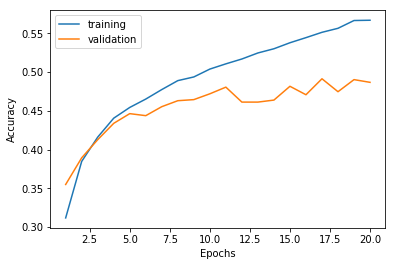

In [8]:
plt.plot(range(1, 20+1), result3.history['acc'], label="training")
plt.plot(range(1, 20+1), result3.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

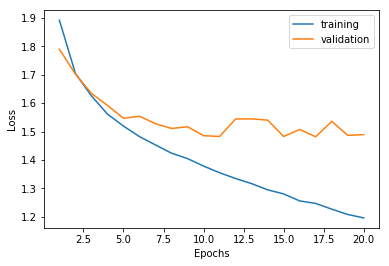

In [9]:
plt.plot(range(1, 20+1), result3.history['loss'], label="training")
plt.plot(range(1, 20+1), result3.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [31]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

modelConv = Sequential()

modelConv.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3))) 
modelConv.add(Dropout(0.25)) 
modelConv.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu')) 
modelConv.add(MaxPooling2D(pool_size=(2,2))) 
modelConv.add(Dropout(0.25)) 
modelConv.add(Flatten()) 
modelConv.add(Dense(units=64, activation='relu')) 
modelConv.add(Dropout(0.5)) 
modelConv.add(Dense(units=10, activation='softmax'))

modelConv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

init_time = time.time() 
resultConv = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128) 
print("Loss: ", loss_and_metrics[0], ", Acc: ", loss_and_metrics[1]) 
print("Time: ", time.time() - init_time)

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (50000, 32, 32, 3)

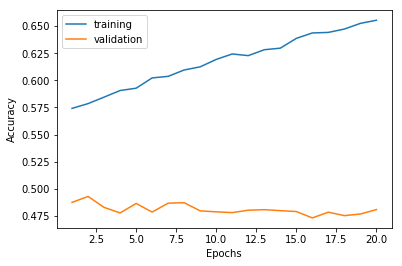

In [12]:
plt.plot(range(1, 20+1), resultConv.history['acc'], label="training")
plt.plot(range(1, 20+1), resultConv.history['val_acc'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

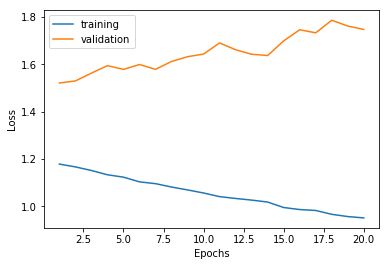

In [13]:
plt.plot(range(1, 20+1), resultConv.history['loss'], label="training")
plt.plot(range(1, 20+1), resultConv.history['val_loss'], label="validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [30]:
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten

modelcopy=Sequential()

modelcopy.add(Conv2D(32,(3,3),padding='same',input_shape=(32,32,3)))
modelcopy.add(Activation('relu'))
modelcopy.add(Conv2D(32,(3,3),padding='same'))
modelcopy.add(Activation('relu'))
modelcopy.add(MaxPool2D(pool_size=(2,2)))
modelcopy.add(Dropout(0.25))

modelcopy.add(Conv2D(64,(3,3),padding='same'))
modelcopy.add(Activation('relu'))
modelcopy.add(Conv2D(64,(3,3),padding='same'))
modelcopy.add(Activation('relu'))
modelcopy.add(MaxPool2D(pool_size=(2,2)))
modelcopy.add(Dropout(0.25))

modelcopy.add(Flatten())
modelcopy.add(Dense(512))
modelcopy.add(Activation('relu'))
modelcopy.add(Dropout(0.5))
modelcopy.add(Dense(10,activation='softmax'))

modelcopy.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#historyCopy=modelcopy.fit(x_train,y_train,batch_size=128,nb_epoch=20,verbose=1,validation_split=0.1)
historyCopy=modelcopy.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2)

#評価
score=modelcopy.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
39296/40000 [============================>.] - ETA: 3s - loss: 1.7068 - acc: 0.3742

KeyboardInterrupt: 